In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


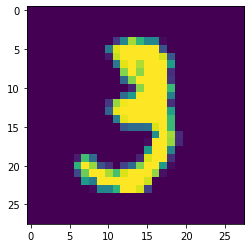

In [7]:
plt.imshow(x_train[10])
plt.show()

In [27]:
x_train=np.reshape(x_train,(-1,784))
x_test=np.reshape(x_test,(-1,784))

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [33]:
model=keras.Sequential([
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3562 - accuracy: 0.8958 - val_loss: 0.1633 - val_accuracy: 0.9528
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1656 - accuracy: 0.9501 - val_loss: 0.1343 - val_accuracy: 0.9600
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1258 - accuracy: 0.9617 - val_loss: 0.1290 - val_accuracy: 0.9628
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1041 - accuracy: 0.9674 - val_loss: 0.1266 - val_accuracy: 0.9650
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0893 - accuracy: 0.9730 - val_loss: 0.1346 - val_accuracy: 0.9638
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0776 - accuracy: 0.9751 - val_loss: 0.1396 - val_accuracy: 0.9650
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0696 - accuracy: 0.9785 - val_loss: 0.1312 - val_accuracy:

In [34]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.9577
0.9577000141143799


In [35]:
pred=model.predict(x_test)
pred_labels=[np.argmax(i) for i in pred]
pred,pred_labels

313/313 [==============================] - 1s 2ms/step


(array([[8.1927878e-13, 5.1069520e-11, 2.4119108e-08, ..., 9.9999696e-01,
         7.1815561e-12, 3.6218102e-09],
        [2.8935614e-14, 2.5479674e-06, 9.9980831e-01, ..., 5.7149174e-10,
         2.0035282e-10, 1.4171395e-13],
        [4.7800155e-09, 9.9943459e-01, 3.2270664e-06, ..., 5.9627135e-05,
         4.5132067e-04, 6.1351311e-06],
        ...,
        [8.3988178e-10, 1.0161126e-11, 3.8499832e-11, ..., 6.9669109e-06,
         7.4099804e-10, 2.0728679e-05],
        [3.5237851e-11, 1.0943963e-08, 1.0825113e-11, ..., 8.5508831e-12,
         6.8388426e-06, 2.4770337e-18],
        [4.2013439e-13, 3.4742359e-18, 4.7344583e-13, ..., 2.4379653e-20,
         1.2370323e-14, 9.0414194e-15]], dtype=float32),
 [7,
  2,
  1,
  0,
  4,
  1,
  4,
  9,
  6,
  9,
  0,
  6,
  9,
  0,
  1,
  5,
  9,
  7,
  3,
  4,
  9,
  6,
  6,
  5,
  4,
  0,
  7,
  4,
  0,
  1,
  3,
  1,
  3,
  4,
  7,
  2,
  7,
  1,
  2,
  1,
  1,
  7,
  4,
  2,
  3,
  5,
  1,
  2,
  4,
  4,
  6,
  3,
  5,
  5,
  6,
  0,
  4,
 

In [39]:
pred_labels[99]

9

In [41]:
y_test[99]

9